In [1]:
%matplotlib inline
import tables
import numpy
import os
import datetime
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib

import glob
import sys
import matplotlib.gridspec as gridspec
import CalculateMeanWinds

import imageio
from scipy import ndimage

In [2]:
def MakeCircle(rPixels,x0,y0):
#     rPixels = 400.
    theta = numpy.linspace(0,2.*numpy.pi,1000)
    x = x0+rPixels*numpy.cos(theta)
    y = y0+rPixels*numpy.sin(theta)
    return x,y

In [3]:
def MakeQuiverFigures(DecimalHours, ZonalWinds,MeridWinds,radius=0.5):
    # can now validate using testmltplots.ipynb
#     timeInDegrees = 180-360.*(DecimalHours/24.)
#     print 'timeInDegrees', DecimalHours,timeInDegrees
#     timeInDegrees = 270.-360.*(DecimalHours/24.)
    timeInDegrees = 90.-(360./24.)*DecimalHours
    timeInDegrees = timeInDegrees+0.
    theta = numpy.deg2rad(timeInDegrees)
    radii = numpy.ones(theta.shape[0])*radius
    Ue = ZonalWinds
    Un = MeridWinds
    #test
    # Vin = 0.0
    # Uin = 1.0
    Ux = -numpy.cos(theta)*Un + numpy.sin(theta)*Ue
    Uy = numpy.sin(theta)*Un + numpy.cos(theta)*Ue




    # plt.show()
    return theta,radii, Ux, Uy

In [4]:
# open Image
im1 = imageio.imread('/Users/srkaeppler/Dropbox/research/data/NSF_PFISR_Eregion_NeutralWinds_SharedData/Larsen_Mikkelsen_1991/ML_Figure4_TidesAlone_105km.png')

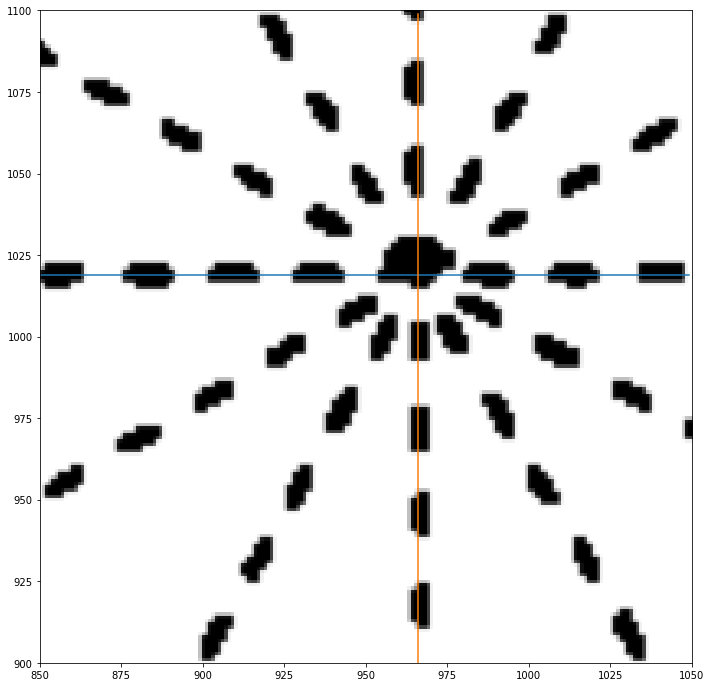

In [5]:
# determine the origin - this is a manual process

plt.figure(figsize=(12,12))
plt.imshow(im1)
plt.ylim([900,1100])
plt.xlim([850,1050])
plt.plot(numpy.arange(850,1050), numpy.ones(200)*1019)
plt.plot(numpy.ones(200)*966, numpy.arange(900,1100))
# plt.plot(numpy.arange(2000), numpy.ones(2000)*1000., 'r.')


1989

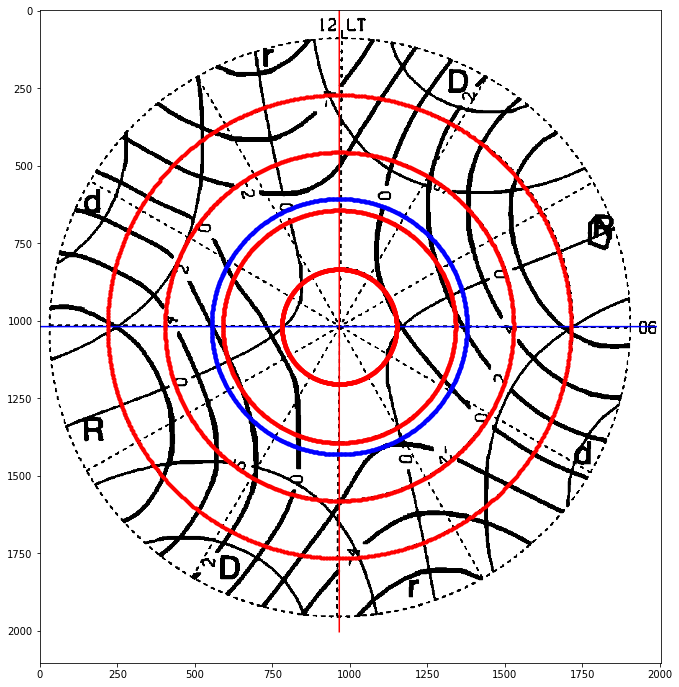

In [6]:
# check the origin
x0 = 966
y0 = 1019
plt.figure(figsize=(12,12))
im = ndimage.rotate(im1, 0.0)
plt.imshow(im)
plt.plot(numpy.arange(im1.shape[0]), numpy.ones(im1.shape[0])*y0, 'b-')
plt.plot(numpy.ones(im1.shape[1])*x0, numpy.arange(im1.shape[1]), 'r-')

x80,y80 = MakeCircle(185,x0,y0)
plt.plot(x80,y80,'r.')


x70,y70 = MakeCircle(375,x0,y0)
plt.plot(x70,y70,'r.')

x60,y60 = MakeCircle(562,x0,y0)
plt.plot(x60,y60,'r.')

x50,y50 = MakeCircle(747,x0,y0)
plt.plot(x50,y50,'r.')

x68,y68 = MakeCircle(412,x0,y0)
plt.plot(x68,y68,'b.')

im1.shape[0]

# need to do usual x,y coordinates kind of like what cecile did



In [7]:
Lat = numpy.array([80,70,60,50])
Radius = numpy.array([185,375,562,747])
p = numpy.polyfit(Lat,Radius,deg=1)
degTest = 65.
radius = p[1]+p[0]*degTest
print radius

467.24999999999955


In [11]:

# configuration test file
configfile = '/Users/srkaeppler/research/data/NSF_PFISR_Eregion_NeutralWinds/MeanProfiles/meanprofile.ini'

# configuration file for the paper:

configfile = '/Users/srkaeppler/research/data/NSF_PFISR_Eregion_NeutralWinds/MeanProfiles/ConfigFileForPaper_02212019.ini'
# CalcMeanWinds = CalculateMeanWinds.CalculateMeanWinds(configfile)
# TmpDict = CalcMeanWinds.main(fnames)
# KeySelect = 'mlt'
# PlotWindsVYear(TmpDict,'mlt',[7,5,4],'PFISR_2008_2011_WindsV3Altitudes.10092018.png')

fnames = ['/Users/srkaeppler/Dropbox/research/data/NSF_PFISR_Eregion_NeutralWinds_SharedData/v0.4.5.2018.11.20/MonthlyWinds/201206_Winds.v0.4.5.2018.11.20.h5'
        ]
CalcMeanWinds = CalculateMeanWinds.CalculateMeanWinds(configfile)
TmpDict = CalcMeanWinds.main(fnames)
KeySelect = 'slt'
ikey = TmpDict.keys()

2019-03-06 14:09:25 - tools.configreader.ConfigReader - DEBUG: ConfigReader class initialized
2019-03-06 14:09:25 - tools.configreader.ConfigReader - DEBUG: ConfigReader class initialized
2019-03-06 14:09:25 - tools.configreader.ConfigReader - DEBUG: No DEFAULT section found in /Users/srkaeppler/research/data/NSF_PFISR_Eregion_NeutralWinds/MeanProfiles/ConfigFileForPaper_02212019.ini, ignoring...
2019-03-06 14:09:25 - tools.configreader.ConfigReader - DEBUG: No DEFAULT section found in /Users/srkaeppler/research/data/NSF_PFISR_Eregion_NeutralWinds/MeanProfiles/ConfigFileForPaper_02212019.ini, ignoring...
2019-03-06 14:09:25 - tools.configreader.ConfigReader - DEBUG: 	[DATADISCARD]
2019-03-06 14:09:25 - tools.configreader.ConfigReader - DEBUG: 	[DATADISCARD]
2019-03-06 14:09:25 - tools.configreader.ConfigReader - DEBUG: 		ZonalWindMax : 500.0
2019-03-06 14:09:25 - tools.configreader.ConfigReader - DEBUG: 		ZonalWindMax : 500.0
2019-03-06 14:09:25 - tools.configreader.ConfigReader - DEBU

In [9]:

mltTimeDict = TmpDict[ikey[0]]['slt']
ialt = 5
# theta,radii,Vprime,Uprime = MakeQuiverFigures(mltTimeDict['DecimalHoursTimeGrid'], \
#                                                           mltTimeDict['MeanZonalWinds'][0,:,ialt],\
#                                                           mltTimeDict['MeanMeridWinds'][0,:,ialt])

n = mltTimeDict['DecimalHoursTimeGrid'].shape[0]
ZonalWind = numpy.ones(n)*100.
MeridionalWind = numpy.ones(n)#*100.
theta,radii,Ux,Uy = MakeQuiverFigures(mltTimeDict['DecimalHoursTimeGrid'], \
                                                           ZonalWind,MeridionalWind)
theta,radii,Ux,Uy = MakeQuiverFigures(mltTimeDict['DecimalHoursTimeGrid'], \
                                    mltTimeDict['MeanZonalWinds'][0,:,ialt],\
                                    mltTimeDict['MeanMeridWinds'][0,:,ialt])
print mltTimeDict['DecimalHoursTimeGrid']
timeInDegrees = 360.*(mltTimeDict['DecimalHoursTimeGrid']/24.)-90
print timeInDegrees
print theta

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75
 18.   18.25 18.5  18.75 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75
 21.   21.25 21.5  21.75 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75]
[-90.   -86.25 -82.5  -78.75 -75.   -71.25 -67.5  -63.75 -60.   -56.25
 -52.5  -48.75 -45.   -41.25 -37.5  -33.75 -30.   -26.25 -22.5  -18.75
 -15.   -11.25  -7.5   -3.75   0.     3.75   7.5   11.25  15.    18.75
  22.5   26.25  30.    33.75  37.5   41.25  45.    48.75  52.5   56.25
  60.    63.75  67.5   71.25  75.    78.75  82.5   86.25  90.    93.75
  97.5  101.25 105.   108.75 112.5  116.25 120.   123.75 127

-90.0


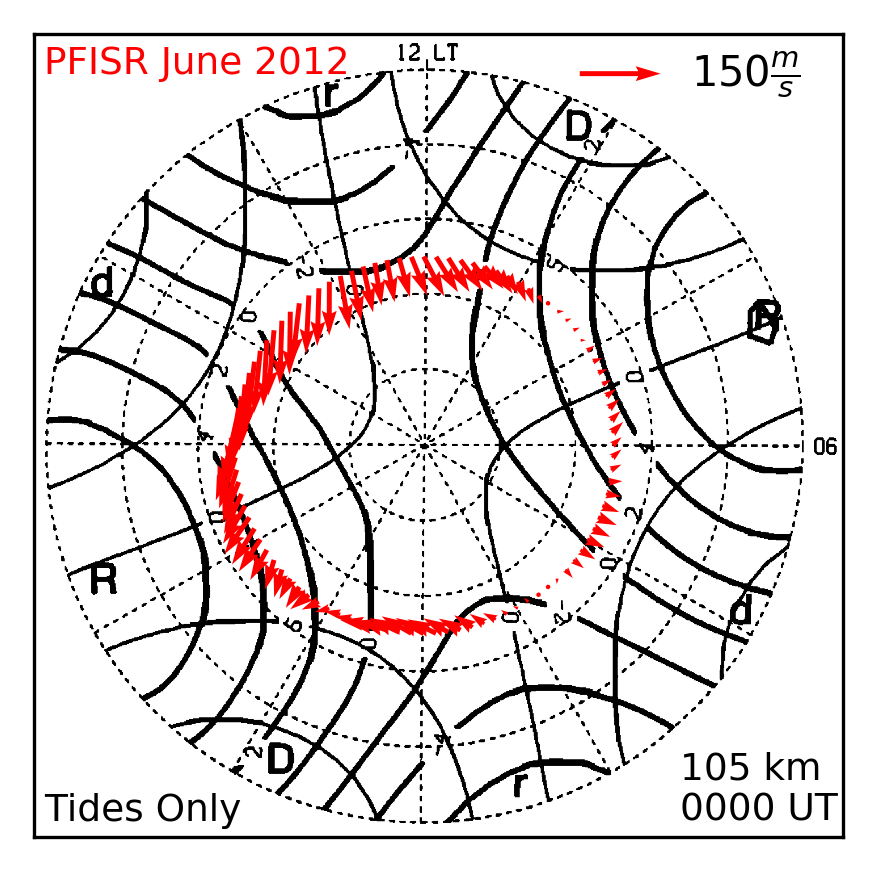

In [14]:
# check the origin
# x0 = 966
# y0 = 998

# theta,radii,Ux,Uy = MakeQuiverFigures(numpy.array([6]),numpy.array([100]),numpy.array([0]))
xW = x0+radius*numpy.cos(theta)
yW = y0+radius*numpy.sin(theta)
plt.figure(figsize=(3,3), dpi=300)
plt.imshow(im1)

x68,y68 = MakeCircle(radius,x0,y0)
scale = 0.75
Q = plt.quiver(xW, yW, Ux, Uy,color='red', pivot='tail',scale=scale,units='xy')
plt.quiverkey(Q, 0.775, 0.95, 150, r'$150 \frac{m}{s}$', labelpos='E',fontproperties={'weight': 'bold', 'size':10})
plt.xticks([])
plt.yticks([])
ikey = TmpDict.keys()
plt.text(25,100, 'PFISR June %s'%ikey[0][0:4], fontsize=9, color='red')
plt.text(25,1950, 'Tides Only', fontsize=9)
plt.text(1600,1950, r'105 km'+'\n'+'0000 UT', fontsize=9)
# plt.quiver(250,100, 250,0, color='red')
# print 90-360.*(12/24.)
plt.tight_layout()
plt.savefig('./FiguresForPaper/LM1991_105km_PFISR%s_TidesAlone.pdf'%ikey[0][0:4])

print 90-360.*(12/24.)